In [10]:
import matplotlib.pyplot as plt
import numpy as np
import psycopg
from pgvector.psycopg import register_vector
from sklearn.manifold import TSNE

In [11]:
conn = psycopg.connect(
    dbname="postgres_db",
    user="postgres_user",
    password="postgres_password",
    host="veld_embeddings_platform_run_sql_server",
    port="5432"
)
conn.autocommit = True
register_vector(conn)
cursor = conn.cursor()
cursor.execute("SELECT version();")
print(cursor.fetchone())

('PostgreSQL 17.4 on x86_64-pc-linux-gnu, compiled by gcc (Debian 10.2.1-6) 10.2.1 20210110, 64-bit',)


In [12]:
def show_plot_tsne(rows, title=None):

    # get labels and values
    #labels = []
    #values = []
    #for w in WORD_LIST:
    #    labels.append(w)
    #    values.append(vector_dict[w])
    labels = [r[0] for r in rows]
    values = [r[1] for r in rows]
    values = np.array(values)

    # reduce
    tsne = TSNE(n_components=2, perplexity=5, random_state=42)
    reduced_vectors_tsne = tsne.fit_transform(values)
    
    # Plot the reduced vectors
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_vectors_tsne[:, 0], reduced_vectors_tsne[:, 1], c='blue', alpha=0.7)

    # Add labels
    for i, label in enumerate(labels):
        plt.text(
            reduced_vectors_tsne[i, 0], 
            reduced_vectors_tsne[i, 1], 
            label,
            fontsize=9, 
            ha="right", 
            color="black"
        )
        
    # plot
    #plt.title(title)
    plt.show()

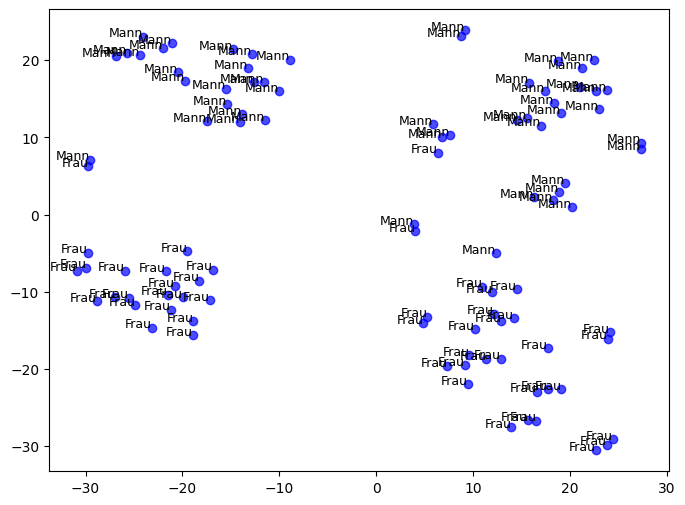

In [13]:
def merge_col_to_label(rows):
    rows_new = []
    for r in rows:
        if False:
            rows_new.append((r[0] + "-" + str(r[1]) + "-" + str(r[2]), r[3]))
        else:
            rows_new.append((r[0], r[3]))
    return rows_new

cursor.execute(
    "select lemma, sentence_id, token_index, embedding "
    "from embeddings__dbmdz__bert_base_german_cased__test "
    "where lemma='Frau'order by sentence_id limit 50;"
)
rows_frau = cursor.fetchall()

cursor.execute(
    "select lemma, sentence_id, token_index, embedding "
    "from embeddings__dbmdz__bert_base_german_cased__test "
    "where lemma='Mann' order by sentence_id limit 50;"
)
rows_mann = cursor.fetchall()

rows_together = rows_frau + rows_mann
rows_together = merge_col_to_label(rows_together)
show_plot_tsne(rows_together)